# Capstone Project - The Battle of Neighborhoods

## Introduction

Introduction where you discuss the business problem and who would be interested in this project.

#### "Would you recommend a location in Hong Kong to open a new cinema?"  
My boss, the stakeholder wants to **open a new cinema as company's new business**.  
  
He explains that watching movie is a part of whole afternoon or night activities. Cinema should has **many restaurants and shopping places nearby**. Transportation is also an important factor. Customer can walk to cinema within **5 minutes** from **public transport facilities** is perfect.  
  
He wants me concentrated on selection of cinema location according to its nearby environment. Cinema facility and rental price is not my concern. He lists out his **top 10 favorite cinemas** in Hong Kong with rating.  

I work with my teammates and select **5 possible locations** to build the cinema. Which location should be suggested to the stakeholder?

## Data

Data where you describe the data that will be used to solve the problem and the source of the data.

According to the question, following data are required.

#### 1. Geographic coordinate of Hong Kong cinemas

I need to **compare 5 possible locations with current cinemas** in Hong Kong. Therefore, I need to find a list of Hong Kong cinema and cinemas' geographic coordinates. Luckily, I can find the list and coordinates from the website https://hkmovie6.com/cinema .

In [1]:
# Import necessary library
import json
import pandas as pd

In [2]:
# Download the cinema list
!wget -O hk_cinema_list.json https://hkmovie6.com/api/cinemas/lists

--2018-10-03 11:44:29--  https://hkmovie6.com/api/cinemas/lists
Resolving hkmovie6.com (hkmovie6.com)... 172.64.164.18, 172.64.165.18, 2606:4700:30::ac40:a412, ...
Connecting to hkmovie6.com (hkmovie6.com)|172.64.164.18|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/json]
Saving to: ‘hk_cinema_list.json’

hk_cinema_list.json     [ <=>                  ]  51.76K   286KB/s   in 0.2s   

2018-10-03 11:44:31 (286 KB/s) - ‘hk_cinema_list.json’ saved [53003]



In [3]:
# Convert the JSON data into DataFrmae
cinemas_json = None
with open('hk_cinema_list.json', 'r', encoding='utf-8') as f:
    cinemas_json = json.load(f)
    
cinemas = []
for data in cinemas_json['data']:    
    cinemas.append({
        'Name': data['name'],
        'ChiName': data['chiName'],
        'Address': data['address'],
        'Latitude': data['lat'],
        'Longitude': data['lon']
    })
df_cinemas = pd.DataFrame(cinemas, columns=['Name','ChiName','Address','Latitude','Longitude'])

In [4]:
print('There are {} cinemas in Hong Kong'.format(len(df_cinemas)))

There are 68 cinemas in Hong Kong


First five records of Hong Kong cinemas

In [5]:
df_cinemas.head()

,Name,ChiName,Address,Latitude,Longitude
0,Emperor Cinemas - Entertainment Building,英皇戲院 - 娛樂行,"3/F, Emperor Cinemas Entertainment Building, 3...",22.281453,114.154230
1,The Coronet @ Emperor Cinemas - Entertainment ...,The Coronet @ 英皇戲院 - 娛樂行,"3/F, Emperor Cinemas Entertainment Building, 3...",22.281453,114.154230
2,Emperor Cinemas - Tuen Mun,英皇戲院 - 屯門新都商場,"3/F, New Town Commercial Arcade, 2 Tuen Lee St...",22.390776,113.975983
3,Broadway Circuit - CYBERPORT,百老匯戲院 - 數碼港,"Shop L1 - 3, Level 1, The Arcade, 100 Cyberpor...",22.261067,114.129825
4,Broadway Circuit - PALACE IFC,百老匯戲院 - PALACE IFC,"Podium L1, IFC Mall, 8 Finance Street, Central",22.285545,114.157979


#### 2. Geographic coordinates of 5 possible cinema addresses
Geographic coordinates of 5 possible cinemas are required and I can use Google Map API to find this information

In [6]:
possible_locations = [
    { 'Location': 'L1', 'Address': 'Sau Mau Ping Shopping Centre, Sau Mau Ping'},
    { 'Location': 'L2', 'Address': 'Tuen Mun Ferry, Tuen Mun'},
    { 'Location': 'L3', 'Address': 'Un Chau Shopping Centre, Cheung Sha Wan'},
    { 'Location': 'L4', 'Address': 'Prosperity Millennia Plaza, North Point'},
    { 'Location': 'L5', 'Address': 'Tsuen Fung Centre Shopping Arcade, Tsuen Wan'},
]

In [7]:
# install the google map api client library
!pip install -U googlemaps

Requirement not upgraded as not directly required: requests<3.0,>=2.11.1 in /home/jupyterlab/conda/lib/python3.6/site-packages (from googlemaps) (2.18.4)
Requirement not upgraded as not directly required: chardet<3.1.0,>=3.0.2 in /home/jupyterlab/conda/lib/python3.6/site-packages (from requests<3.0,>=2.11.1->googlemaps) (3.0.4)
Requirement not upgraded as not directly required: idna<2.7,>=2.5 in /home/jupyterlab/conda/lib/python3.6/site-packages (from requests<3.0,>=2.11.1->googlemaps) (2.6)
Requirement not upgraded as not directly required: urllib3<1.23,>=1.21.1 in /home/jupyterlab/conda/lib/python3.6/site-packages (from requests<3.0,>=2.11.1->googlemaps) (1.22)
Requirement not upgraded as not directly required: certifi>=2017.4.17 in /home/jupyterlab/conda/lib/python3.6/site-packages (from requests<3.0,>=2.11.1->googlemaps) (2018.8.24)
  Running setup.py bdist_wheel for googlemaps ... done
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/3c/3f/25/ce6d7722dba07e5d4a12d27ab38f3

In [8]:
google_act = None
with open('google_map_act.json', 'r') as f:
    google_act = json.load(f)
    
GOOGLE_MAP_API_KEY = google_act['api_key']    

import googlemaps
gmaps = googlemaps.Client(key=GOOGLE_MAP_API_KEY)

In [9]:
# Retrieve geolocation and create the dataframe of pending cinema addresses
def getLatLng(address):
    latlnt = gmaps.geocode('{}, Hong Kong'.format(address))
    return (latlnt[0]['geometry']['location']['lat'], latlnt[0]['geometry']['location']['lng'])

Dataframe of 5 target locations with geographic coordinates information

In [10]:
for loc in possible_locations:        
    (lat, lng) = getLatLng(loc['Address'])
    loc['Latitude'] = lat
    loc['Longitude'] = lng
    
df_possible_locations = pd.DataFrame(possible_locations, columns=['Location', 'Address', 'Latitude', 'Longitude'])
df_possible_locations

,Location,Address,Latitude,Longitude
0,L1,"Sau Mau Ping Shopping Centre, Sau Mau Ping",22.319503,114.232187
1,L2,"Tuen Mun Ferry, Tuen Mun",22.371780,113.966039
2,L3,"Un Chau Shopping Centre, Cheung Sha Wan",22.337280,114.156457
3,L4,"Prosperity Millennia Plaza, North Point",22.291698,114.208168
4,L5,"Tsuen Fung Centre Shopping Arcade, Tsuen Wan",22.372112,114.119317


#### 3. Favorite cinema list of stakeholder

The favorite cinema list of stakeholder is an important information that I can **use it as profile to select the best location**.  

In [11]:
boss_favorite = [
    {'Name': 'Broadway Circuit - MONGKOK', 'Rating': 4.5},
    {'Name': 'Broadway Circuit - The ONE', 'Rating': 4.5},
    {'Name': 'Grand Ocean', 'Rating': 4.3},
    {'Name': 'The Grand Cinema', 'Rating': 3.4},
    {'Name': 'AMC Pacific Place', 'Rating': 2.3},
    {'Name': 'UA IMAX @ Airport', 'Rating': 1.5},
]

df_boss_favorite = pd.DataFrame(boss_favorite, columns=['Name','Rating'])
df_boss_favorite

,Name,Rating
0,Broadway Circuit - MONGKOK,4.5
1,Broadway Circuit - The ONE,4.5
2,Grand Ocean,4.3
3,The Grand Cinema,3.4
4,AMC Pacific Place,2.3
5,UA IMAX @ Airport,1.5


#### 4. Eating, Shopping and Public transportation facility around cinema
The recommended cinema location needs to have many eating and shopping venues nearby. Convenient public transport is also required.  
These data can be found by using FourSquare API to find these venues around the location. The radius of exploration distance is set to 500 meters, which is about 5 minutes walking distance.

Following type of venue category will be used to search

In [12]:
fs_categories = {
    'Food': '4d4b7105d754a06374d81259',
    'Shop & Service': '4d4b7105d754a06378d81259',
    'Bus Stop': '52f2ab2ebcbc57f1066b8b4f',
    'Metro Station': '4bf58dd8d48988d1fd931735',
    'Nightlife Spot': '4d4b7105d754a06376d81259',
    'Arts & Entertainment': '4d4b7104d754a06370d81259'
}

In [13]:
', '.join([ cat for cat in fs_categories])

'Food, Shop & Service, Bus Stop, Metro Station, Nightlife Spot, Arts & Entertainment'

In [14]:
cinema = df_cinemas.loc[0]

In [15]:
print('Use the first cinema "{}" in the list as example to explore venues nearyby'.format(cinema['Name']))

Use the first cinema "Emperor Cinemas - Entertainment Building" in the list as example to explore venues nearyby


In [16]:
# Install FourSquare client library
!pip install foursquare

  Running setup.py bdist_wheel for foursquare ... done
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/c1/a4/ff/e07a4f4f02ef7189c5b1e0738a09131f6c5f2de811ce3a39a0
Successfully built foursquare
distributed 1.21.8 requires msgpack, which is not installed.


In [17]:
fs_act = None
with open('fs_act.json') as json_data:
    fs_act = json.load(json_data)

In [18]:
import foursquare
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
fs = foursquare.Foursquare(client_id=fs_act['client_id'], client_secret=fs_act['client_secret'])

In [19]:
RADIUS = 500 # 500m, around 5 minutes walking time

In [20]:
# Define a function to search nearby information and convert the result as dataframe
def venues_nearby(latitude, longitude, category, verbose=True):    
    results = fs.venues.search(
        params = {
            'query': category, 
            'll': '{},{}'.format(latitude, longitude),
            'radius': RADIUS,
            'categoryId': fs_categories[category]
        }
    )    
    df = json_normalize(results['venues'])
    cols = ['Name','Latitude','Longitude','Tips','Users','Visits']    
    if( len(df) == 0 ):        
        df = pd.DataFrame(columns=cols)
    else:        
        df = df[['name','location.lat','location.lng','stats.tipCount','stats.usersCount','stats.visitsCount']]
        df.columns = cols
    if( verbose ):
        print('{} "{}" venues are found within {}m of location'.format(len(df), category, RADIUS))
    return df
    

Find Metro Station around the cinema

In [21]:
venues_nearby(cinema['Latitude'], cinema['Longitude'], 'Metro Station').head()

2 "Metro Station" venues are found within 500m of location


,Name,Latitude,Longitude,Tips,Users,Visits
0,MTR Central Station (港鐵中環站),22.281911,114.158406,0,0,0
1,MTR Hong Kong Station (港鐵香港站),22.284926,114.158314,0,0,0


Find Bus Stop around the cinema

In [22]:
venues_nearby(cinema['Latitude'], cinema['Longitude'], 'Bus Stop').head()

30 "Bus Stop" venues are found within 500m of location


,Name,Latitude,Longitude,Tips,Users,Visits
0,Seymour Road / Robinson Road Bus Stop 西摩道／羅便臣道巴士站,22.280465,114.150347,0,0,0
1,Douglas Street Bus Stop 德忌利士街巴士站,22.283273,114.156910,0,0,0
2,Hang Seng Bank Headquarters / Connaught Road C...,22.284741,114.156404,0,0,0
3,HSBC Headquarters Bus Stop 匯豐總行巴士站,22.280577,114.159446,0,0,0
4,Dr. Sun Yat-Sen Museum Bus Stop 孫中山紀念館巴士站,22.279132,114.152743,0,0,0


Find eating places around the cinema

In [23]:
venues_nearby(cinema['Latitude'], cinema['Longitude'], 'Food').head()

25 "Food" venues are found within 500m of location


,Name,Latitude,Longitude,Tips,Users,Visits
0,Mana! Fast Slow Food,22.282921,114.154651,0,0,0
1,Good Luck Thai Food (鴻運泰國美食),22.281165,114.155296,0,0,0
2,Soul Food,22.281668,114.152495,0,0,0
3,Chiu Lung Fast Food (昭隆美食),22.282659,114.156753,0,0,0
4,Sun Hing Fast Food (新興美食),22.282521,114.156717,0,0,0


In [24]:
venues_nearby(cinema['Latitude'], cinema['Longitude'], 'Arts & Entertainment').head()

12 "Arts & Entertainment" venues are found within 500m of location


,Name,Latitude,Longitude,Tips,Users,Visits
0,Tai Kwun Centre for Heritage and Arts (大館古蹟及藝術館),22.281668,114.154216,0,0,0
1,Wah Tung China Arts Limited (華通陶瓷藝術有限公司),22.283046,114.152723,0,0,0
2,Ravenel Fine Arts Limited 睿芙奧,22.281819,114.156906,0,0,0
3,Ben Brown Fine Arts,22.281853,114.157285,0,0,0
4,KONG Arts Space,22.281751,114.153300,0,0,0


## Methodology 

Methodology section which represents the main component of the report where you discuss and describe any exploratory data analysis that you did, any inferential statistical testing that you performed, and what machine learnings were used and why.

With above data, I can use content-based recommendation technique to resolve the problem.

Combine with FourSquare API which provides how many venues in different category of Hong Kong cinemas, a matrix which captured characteristic of venues nearby cinema are built. Stakeholder's favorite list is the profile to combine with the matrix to become a weighted matrix of favorite cinema.

The weighted matrix can be applied on 5 target locations with venues information to generate a ranking result. The the top one on the ranking list can be recommended to the stakeholder.

Before building the matrix, I have to prepare the required data and apply some data analysis.

#### Data Cleansing and Preparation

Check the cinemas dataset contains any duplicated address

In [25]:
duplicated = df_cinemas.duplicated('Address', keep=False)
df_cinemas[duplicated].sort_values('Address')

,Name,ChiName,Address,Latitude,Longitude
5,Cinema City VICTORIA (Causeway Bay),Cinema City VICTORIA (銅鑼灣),"2-8 Sugar Street, Causeway Bay, Hong Kong",22.279805,114.187126
6,Diamond Suite VIP House @ Cinema City VICTORIA...,Diamond Suite VIP House @ Cinema City VICTORIA...,"2-8 Sugar Street, Causeway Bay, Hong Kong",22.279805,114.187126
28,The Grand Cinema,The Grand Cinema,"2/F, Elements, 1 Austin Road West, Kowloon",22.304118,114.161466
29,The Grand SC Starsuite,The Grand SC Starsuite,"2/F, Elements, 1 Austin Road West, Kowloon",22.304118,114.161466
0,Emperor Cinemas - Entertainment Building,英皇戲院 - 娛樂行,"3/F, Emperor Cinemas Entertainment Building, 3...",22.281453,114.154230
1,The Coronet @ Emperor Cinemas - Entertainment ...,The Coronet @ 英皇戲院 - 娛樂行,"3/F, Emperor Cinemas Entertainment Building, 3...",22.281453,114.154230
43,BEA IMAX @ UA iSQUARE,BEA IMAX @ UA iSQUARE,"7/F, iSQUARE, 63 Nathan Road, Tsimshatsui",22.296648,114.171974
46,Phoenix Club @ UA iSQUARE,鳯凰影院 @ UA iSQUARE,"7/F, iSQUARE, 63 Nathan Road, Tsimshatsui",22.296648,114.171974
49,UA iSQUARE,UA iSQUARE,"7/F, iSQUARE, 63 Nathan Road, Tsimshatsui",22.296648,114.171974
42,BEA IMAX @ UA Cine Moko,BEA IMAX @ UA Cine Moko,"L4, MOKO, 193 Prince Edward Road West, Mongkok...",22.323800,114.172000


Some "special house" in cinema are separated as a new cinema in www.hkmovie6.com  
These records are duplicated in my case and should be corrected.

In [26]:
# The Grand SC Starsuite -> The Grand Cinema
df_cinemas.loc[29, 'Name'] = 'The Grand Cinema'

# XXX @ UA MegaBox -> UA MegaBox
df_cinemas.loc[44, 'Name'] = 'UA MegaBox'
df_cinemas.loc[45, 'Name'] = 'UA MegaBox'

# BEA IMAX @ UA Cine Moko -> UA Cine Moko
df_cinemas.loc[42, 'Name'] = 'UA Cine Moko'

# XXX @ UA iSQUARE -> iSQUARE
df_cinemas.loc[43, 'Name'] = 'UA iSQUARE'
df_cinemas.loc[46, 'Name'] = 'UA iSQUARE'

# Emperor Cinemas - Entertainment Building
df_cinemas.loc[1, 'Name'] = 'Emperor Cinemas - Entertainment Building'

# Cinema City VICTORIA (Causeway Bay)
df_cinemas.loc[6, 'Name'] = 'Cinema City VICTORIA (Causeway Bay)'

In [27]:
df_cinemas[duplicated]

,Name,ChiName,Address,Latitude,Longitude
0,Emperor Cinemas - Entertainment Building,英皇戲院 - 娛樂行,"3/F, Emperor Cinemas Entertainment Building, 3...",22.281453,114.154230
1,Emperor Cinemas - Entertainment Building,The Coronet @ 英皇戲院 - 娛樂行,"3/F, Emperor Cinemas Entertainment Building, 3...",22.281453,114.154230
5,Cinema City VICTORIA (Causeway Bay),Cinema City VICTORIA (銅鑼灣),"2-8 Sugar Street, Causeway Bay, Hong Kong",22.279805,114.187126
6,Cinema City VICTORIA (Causeway Bay),Diamond Suite VIP House @ Cinema City VICTORIA...,"2-8 Sugar Street, Causeway Bay, Hong Kong",22.279805,114.187126
28,The Grand Cinema,The Grand Cinema,"2/F, Elements, 1 Austin Road West, Kowloon",22.304118,114.161466
29,The Grand Cinema,The Grand SC Starsuite,"2/F, Elements, 1 Austin Road West, Kowloon",22.304118,114.161466
42,UA Cine Moko,BEA IMAX @ UA Cine Moko,"L4, MOKO, 193 Prince Edward Road West, Mongkok...",22.323800,114.172000
43,UA iSQUARE,BEA IMAX @ UA iSQUARE,"7/F, iSQUARE, 63 Nathan Road, Tsimshatsui",22.296648,114.171974
44,UA MegaBox,BEA IMAX @ UA MegaBox,"Level 11, MegaBox, Enterprise Square 5, 38 Wan...",22.319533,114.208555
45,UA MegaBox,BEA Oscars Club @ UA MegaBox,"Level 11, MegaBox, Enterprise Square 5, 38 Wan...",22.319533,114.208555


In [28]:
df_cinemas.drop_duplicates('Address', inplace=True, keep='first')

Drop the duplicated cinema records

In [29]:
df_cinemas[df_cinemas.duplicated('Name')]

,Name,ChiName,Address,Latitude,Longitude


In [30]:
df_cinemas.head()

,Name,ChiName,Address,Latitude,Longitude
0,Emperor Cinemas - Entertainment Building,英皇戲院 - 娛樂行,"3/F, Emperor Cinemas Entertainment Building, 3...",22.281453,114.154230
2,Emperor Cinemas - Tuen Mun,英皇戲院 - 屯門新都商場,"3/F, New Town Commercial Arcade, 2 Tuen Lee St...",22.390776,113.975983
3,Broadway Circuit - CYBERPORT,百老匯戲院 - 數碼港,"Shop L1 - 3, Level 1, The Arcade, 100 Cyberpor...",22.261067,114.129825
4,Broadway Circuit - PALACE IFC,百老匯戲院 - PALACE IFC,"Podium L1, IFC Mall, 8 Finance Street, Central",22.285545,114.157979
5,Cinema City VICTORIA (Causeway Bay),Cinema City VICTORIA (銅鑼灣),"2-8 Sugar Street, Causeway Bay, Hong Kong",22.279805,114.187126


In [31]:
df_cinemas['ChiName'].to_frame()

,ChiName
0,英皇戲院 - 娛樂行
2,英皇戲院 - 屯門新都商場
3,百老匯戲院 - 數碼港
4,百老匯戲院 - PALACE IFC
5,Cinema City VICTORIA (銅鑼灣)
7,百老匯戲院 - 電影中心
8,百老匯戲院 - 荷里活
9,百老匯戲院 - 旺角
10,百老匯戲院 - MOViE MOViE Cityplaza
11,百老匯戲院 - PALACE apm


Cinema '新光戲院大劇場' and '大館' should be considered as cinema in Hong Kong. These records must be rmeoved

In [32]:
df_cinemas.drop(index=[65,67], inplace=True)

In [33]:
df_cinemas.drop(axis=1, columns=['ChiName'], inplace=True)

In [34]:
df_cinemas.head()

,Name,Address,Latitude,Longitude
0,Emperor Cinemas - Entertainment Building,"3/F, Emperor Cinemas Entertainment Building, 3...",22.281453,114.154230
2,Emperor Cinemas - Tuen Mun,"3/F, New Town Commercial Arcade, 2 Tuen Lee St...",22.390776,113.975983
3,Broadway Circuit - CYBERPORT,"Shop L1 - 3, Level 1, The Arcade, 100 Cyberpor...",22.261067,114.129825
4,Broadway Circuit - PALACE IFC,"Podium L1, IFC Mall, 8 Finance Street, Central",22.285545,114.157979
5,Cinema City VICTORIA (Causeway Bay),"2-8 Sugar Street, Causeway Bay, Hong Kong",22.279805,114.187126


Check the shape of cinemas dataset

In [35]:
df_cinemas.shape

(58, 4)

Now I can use the FourSquare API to explore nearby venues of Hong Kong cinemas

In [36]:
from pathlib import Path

venues_csv = Path('./cinemas_venues.csv')
df_venues = None

# check the venues data is explored and downloaded 
if( venues_csv.exists() ):
    df_venues = pd.read_csv('./cinemas_venues.csv')
else:    
    # construct a dataframe to store data
    df_venues = pd.DataFrame(columns=['Cinema Name', 'Category', 'Name', 'Latitude', 'Longitude', 'Tips', 'Users', 'Visits'])
    for (name, address, latitude, longitude) in df_cinemas.itertuples(index=False):
        for cat, cat_id in fs_categories.items():
            df = venues_nearby(latitude, longitude, cat, verbose=False)
            df['Cinema Name'] = name
            df['Category'] = cat
            df_venues = df_venues.append(df, sort=True)
    df_venues.to_csv('cinemas_venues.csv', index=False)

In [37]:
print('Total {} of venues are found'.format(len(df_venues)))

Total 2223 of venues are found


In [38]:
# check the shape of data
df_venues.shape

(2223, 8)

In [39]:
# check some data
df_venues.head()

,Category,Cinema Name,Latitude,Longitude,Name,Tips,Users,Visits
0,Food,Emperor Cinemas - Entertainment Building,22.282921,114.154651,Mana! Fast Slow Food,0,0,0
1,Food,Emperor Cinemas - Entertainment Building,22.281165,114.155296,Good Luck Thai Food (鴻運泰國美食),0,0,0
2,Food,Emperor Cinemas - Entertainment Building,22.281668,114.152495,Soul Food,0,0,0
3,Food,Emperor Cinemas - Entertainment Building,22.282659,114.156753,Chiu Lung Fast Food (昭隆美食),0,0,0
4,Food,Emperor Cinemas - Entertainment Building,22.282521,114.156717,Sun Hing Fast Food (新興美食),0,0,0


Number of venues in each category

In [40]:
df_venues['Category'].value_counts().to_frame(name='Count')

,Count
Shop & Service,874
Bus Stop,704
Food,518
Arts & Entertainment,65
Metro Station,61
Nightlife Spot,1


In [41]:
df_venues[(df_venues.Tips > 0)|(df_venues.Users > 0)|(df_venues.Visits > 0)]

,Category,Cinema Name,Latitude,Longitude,Name,Tips,Users,Visits


In [42]:
df_venues.drop(columns=['Tips','Users','Visits'], inplace=True)

In [43]:
df_venues[df_venues.Category=='Nightlife Spot']

,Category,Cinema Name,Latitude,Longitude,Name
87,Nightlife Spot,Emperor Cinemas - Entertainment Building,22.282246,114.152651,The Spot Bar


In [44]:
df_venues.drop(index=87, inplace=True)

Comapred with other categories, only one 'Nightlife Spot' venue. This category is removed.

In [45]:
df_venues.shape

(2222, 5)

Explore nearby venues of 5 possible/target locations

In [46]:
df_target_venues = pd.DataFrame(columns=['Location', 'Category', 'Name', 'Latitude', 'Longitude', 'Tips', 'Users', 'Visits'])
for (location, address, latitude, longitude) in df_possible_locations.itertuples(index=False):
    for cat, cat_id in fs_categories.items():
        df = venues_nearby(latitude, longitude, cat, verbose=False)
        df['Location'] = location
        df['Category'] = cat
        df_target_venues = df_target_venues.append(df, sort=True)

In [47]:
df_target_venues.head()

,Category,Latitude,Location,Longitude,Name,Tips,Users,Visits
0,Shop & Service,22.319338,L1,114.231681,Sau Mau Ping Shopping Centre (秀茂坪商場),0,0,0
1,Shop & Service,22.320360,L1,114.234489,On Tat Shopping Centre (安達商場),0,0,0
2,Shop & Service,22.314968,L1,114.229987,Tsui Ping Shopping Circuit 翠屏商場,0,0,0
0,Bus Stop,22.316921,L1,114.235785,Sau Fai House Bus Stop 秀暉樓巴士站,0,0,0
0,Food,22.372900,L2,113.964900,Lee Kam Kee Vietnamese Food & Drinks (李錦基越南飲食),0,0,0


In [48]:
df_target_venues[(df_target_venues.Tips > 0)|(df_target_venues.Users > 0)|(df_target_venues.Visits > 0)]

,Category,Latitude,Location,Longitude,Name,Tips,Users,Visits


In [49]:
df_target_venues.drop(columns=['Tips','Users','Visits'], inplace=True)

In [50]:
df_target_venues['Category'].value_counts().to_frame(name='Count')

,Count
Bus Stop,36
Shop & Service,30
Food,12
Metro Station,4
Arts & Entertainment,1


No venue is found for 'Nightlife Spot' category

In [51]:
df_target_venues.shape

(83, 5)

I only interested in number of venues in each category of dataframe.  

In [52]:
df_venues_count = df_venues.groupby(['Cinema Name','Category'], as_index=False).count()
df_venues_count.drop(columns=['Latitude','Longitude'], inplace=True)
df_venues_count.rename(columns={'Name':'Count'}, inplace=True)
df_venues_count.head()

,Cinema Name,Category,Count
0,AMC Pacific Place,Arts & Entertainment,8
1,AMC Pacific Place,Bus Stop,13
2,AMC Pacific Place,Food,8
3,AMC Pacific Place,Metro Station,1
4,AMC Pacific Place,Shop & Service,21


In [53]:
df_venues_count = df_venues_count.pivot(index='Cinema Name', columns='Category', values='Count').fillna(0)
df_venues_count.head()

Category,Arts & Entertainment,Bus Stop,Food,Metro Station,Shop & Service
Cinema Name,,,,,
AMC Pacific Place,8.0,13.0,8.0,1.0,21.0
Broadway Circuit - CINEMATHEQUE,3.0,25.0,13.0,1.0,25.0
Broadway Circuit - CYBERPORT,0.0,2.0,1.0,0.0,3.0
Broadway Circuit - HOLLYWOOD,1.0,7.0,0.0,1.0,6.0
Broadway Circuit - KINGSWOOD GINZA,0.0,3.0,0.0,0.0,2.0


In [54]:
# Do the same process on target locations
df_target_venues_count = df_target_venues.groupby(['Location','Category']).size().reset_index(name='Count')
df_target_venues_count = df_target_venues_count.pivot(index='Location', columns='Category', values='Count').fillna(0)

In [55]:
df_target_venues_count

Category,Arts & Entertainment,Bus Stop,Food,Metro Station,Shop & Service
Location,,,,,
L1,0.0,1.0,0.0,0.0,3.0
L2,0.0,4.0,2.0,0.0,1.0
L3,0.0,9.0,4.0,1.0,9.0
L4,1.0,9.0,2.0,1.0,5.0
L5,0.0,13.0,4.0,2.0,12.0


Check boss's favorite cinema list

In [56]:
boss_favorite

[{'Name': 'Broadway Circuit - MONGKOK', 'Rating': 4.5},
 {'Name': 'Broadway Circuit - The ONE', 'Rating': 4.5},
 {'Name': 'Grand Ocean', 'Rating': 4.3},
 {'Name': 'The Grand Cinema', 'Rating': 3.4},
 {'Name': 'AMC Pacific Place', 'Rating': 2.3},
 {'Name': 'UA IMAX @ Airport', 'Rating': 1.5}]

Check boss's favorite cinemas are inside the hong kong cinemas dataset

Check the Hong Kong cinema list contains all stakeholder's favorite cinemas

In [57]:
names = [ cinema['Name'] for cinema in boss_favorite ]
df_cinemas[df_cinemas.Name.isin(names)]

,Name,Address,Latitude,Longitude
9,Broadway Circuit - MONGKOK,"6-12 Sai Yeung Choi Street, Mongkok, Kowloon",22.317077,114.170662
12,Broadway Circuit - The ONE,"6-11/F, The ONE, No. 100 Nathan Road, Tsim Sha...",22.300058,114.172667
17,AMC Pacific Place,"Level 1, Pacific Place, 88 Queensway Road, Hon...",22.277673,114.165566
28,The Grand Cinema,"2/F, Elements, 1 Austin Road West, Kowloon",22.304118,114.161466
32,Grand Ocean,"Ocean Centre, 3 Canton Road, Kowloon",22.295165,114.169176
52,UA IMAX @ Airport,"6P059, Level 6, Terminal 2, 1 Sky Plaza Road, ...",22.316668,113.937787


Stakholder's favorite cinema list

In [58]:
df_boss_favorite = pd.DataFrame(boss_favorite, columns=['Name','Rating'])
df_boss_favorite

,Name,Rating
0,Broadway Circuit - MONGKOK,4.5
1,Broadway Circuit - The ONE,4.5
2,Grand Ocean,4.3
3,The Grand Cinema,3.4
4,AMC Pacific Place,2.3
5,UA IMAX @ Airport,1.5


#### Data Analysis

In [59]:
!conda install seaborn=0.9 --yes

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda

  added / updated specs: 
    - seaborn=0.9


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    seaborn-0.9.0              |           py36_0         379 KB
    conda-4.5.11               |           py36_0         1.0 MB
    ------------------------------------------------------------
                                           Total:         1.4 MB

The following packages will be UPDATED:

    certifi:         2018.8.24-py36_1     conda-forge --> 2018.8.24-py36_1 
    conda:           4.5.11-py36_0        conda-forge --> 4.5.11-py36_0    
    openssl:         1.0.2p-h470a237_0    conda-forge --> 1.0.2p-h14c3975_0
    seaborn:         0.8.1-py36hfad7ec4_0             --> 0.9.0-py36_0     

The following packages will be DOWNGRADED:

    ca-certificates: 2018.8.24-ha4d7672_0 conda-forge --> 2018.0

In [60]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Check the data type of variables

In [61]:
df_venues_count.dtypes.to_frame(name='Data Type')

,Data Type
Category,
Arts & Entertainment,float64
Bus Stop,float64
Food,float64
Metro Station,float64
Shop & Service,float64


All datatype is numeric

Generates descriptive statistics that summarize the central tendency,
dispersion and shape of a dataset's distribution

In [62]:
df_venues_count.describe()

Category,Arts & Entertainment,Bus Stop,Food,Metro Station,Shop & Service
count,57.000000,57.000000,57.000000,57.000000,57.000000
mean,1.140351,12.350877,9.087719,1.070175,15.333333
std,2.430745,9.510316,8.018462,0.820706,10.736010
min,0.000000,1.000000,0.000000,0.000000,2.000000
25%,0.000000,5.000000,2.000000,1.000000,6.000000
50%,0.000000,9.000000,6.000000,1.000000,11.000000
75%,1.000000,21.000000,16.000000,1.000000,30.000000
max,12.000000,30.000000,27.000000,4.000000,30.000000


Cinema really has many 'Bus Stop', 'Food', 'Shop & Service' venues around. However it is unusual that a cinema has 4 metro stations nearby (within 500 meters).  

In [63]:
df_venues_count['Metro Station'].value_counts().sort_index().to_frame('Cinema Count')

,Cinema Count
0.0,13
1.0,30
2.0,12
3.0,1
4.0,1


One cinema contains 4 Metro Station around

In [64]:
df_venues_count[df_venues_count['Metro Station'] > 2]

Category,Arts & Entertainment,Bus Stop,Food,Metro Station,Shop & Service
Cinema Name,,,,,
Broadway Circuit - The ONE,3.0,21.0,27.0,3.0,30.0
LUX Theatre,0.0,12.0,12.0,4.0,11.0


In [65]:
metro_over_2 = df_venues_count[df_venues_count['Metro Station'] > 2].index.tolist()
df_venues[(df_venues['Cinema Name'].isin(metro_over_2)) & (df_venues.Category == 'Metro Station')]

,Category,Cinema Name,Latitude,Longitude,Name
609,Metro Station,Broadway Circuit - The ONE,22.297150,114.172230,MTR Tsim Sha Tsui Station (港鐵尖沙咀站)
610,Metro Station,Broadway Circuit - The ONE,22.304787,114.171664,MTR Jordan Station (港鐵佐敦站)
611,Metro Station,Broadway Circuit - The ONE,22.295573,114.173652,MTR East Tsim Sha Tsui Station (港鐵尖東站)
2180,Metro Station,LUX Theatre,22.305477,114.188624,MTR Whampoa Station (港鐵黃埔站)
2181,Metro Station,LUX Theatre,22.309115,114.182668,MTR Ho Man Tin Station (港鐵何文田站)
2182,Metro Station,LUX Theatre,22.303110,114.181630,Mtr Hung Hom Station Platform 2
2183,Metro Station,LUX Theatre,22.303085,114.181160,Mtr Hung Hom Station Platform 4


Venue 'Mtr Hung Hom Station Platform 4' is duplicated and should be removed.

In [66]:
df_venues.loc[2182, 'Name'] = 'MTR Hung Hom Station'

In [67]:
df_venues.drop(index=2183, inplace=True)

Re-construct the dataframe again

In [68]:
df_venues_count = df_venues.groupby(['Cinema Name','Category'], as_index=False).count()
df_venues_count.drop(columns=['Latitude','Longitude'], inplace=True)
df_venues_count.rename(columns={'Name':'Count'}, inplace=True)
df_venues_count = df_venues_count.pivot(index='Cinema Name', columns='Category', values='Count').fillna(0)
df_venues_count.head()

Category,Arts & Entertainment,Bus Stop,Food,Metro Station,Shop & Service
Cinema Name,,,,,
AMC Pacific Place,8.0,13.0,8.0,1.0,21.0
Broadway Circuit - CINEMATHEQUE,3.0,25.0,13.0,1.0,25.0
Broadway Circuit - CYBERPORT,0.0,2.0,1.0,0.0,3.0
Broadway Circuit - HOLLYWOOD,1.0,7.0,0.0,1.0,6.0
Broadway Circuit - KINGSWOOD GINZA,0.0,3.0,0.0,0.0,2.0


Plot the distribution of other variables

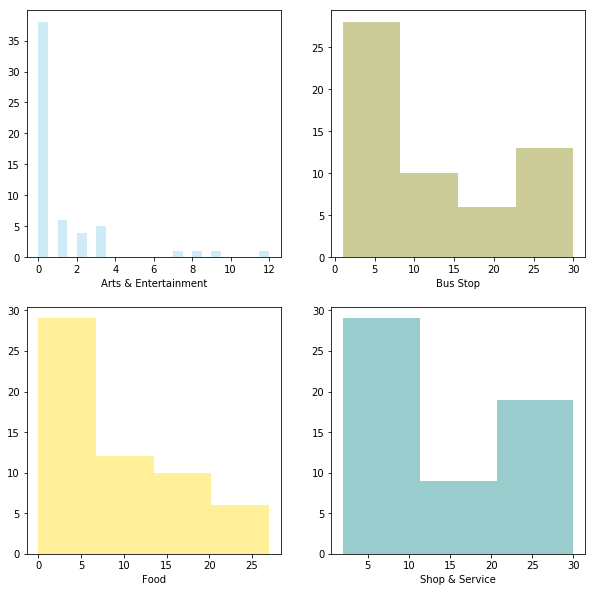

In [69]:
f, axes = plt.subplots(2, 2, figsize=(10, 10))
sns.distplot(df_venues_count['Arts & Entertainment'] , color="skyblue", ax=axes[0, 0], kde=False)
sns.distplot(df_venues_count['Bus Stop'] , color="olive", ax=axes[0, 1], kde=False)
sns.distplot(df_venues_count['Food'] , color="gold", ax=axes[1, 0], kde=False)
sns.distplot(df_venues_count['Shop & Service'] , color="teal", ax=axes[1, 1], kde=False)

The distribution of other variables are quite similar. Now check their **Pearson Correlation**

In [70]:
df_venues_count.corr()

Category,Arts & Entertainment,Bus Stop,Food,Metro Station,Shop & Service
Category,,,,,
Arts & Entertainment,1.000000,0.494525,0.414387,0.389271,0.506590
Bus Stop,0.494525,1.000000,0.893873,0.563799,0.896388
Food,0.414387,0.893873,1.000000,0.583749,0.872533
Metro Station,0.389271,0.563799,0.583749,1.000000,0.499546
Shop & Service,0.506590,0.896388,0.872533,0.499546,1.000000


It seems that 'Bus Stop', 'Shop & Service' and 'Food' category are highly correlated.  
Find **P-Value** of the variables

By convention, when the p-value is:
- < 0.001 we say there is strong evidence that the correlation is significant,
- < 0.05; there is moderate evidence that the correlation is significant,
- < 0.1; there is weak evidence that the correlation is significant, and
- is >  0.1; there is no evidence that the correlation is significant.

In [71]:
from scipy import stats

In [72]:
p_value_data = []
for left in df_venues_count.columns:
    p_values = [left]
    for right in df_venues_count.columns:        
        pearson_coef, p_value = stats.pearsonr(df_venues_count[left], df_venues_count[right])
        if(p_value < 0.001):
            p_values.append('strong')
        elif(p_value < 0.05):
            p_values.append('moderate')
        elif(p_value < 0.1):
            p_values.append('weak')
        else:
            p_values.append('no')            
    p_value_data.append(p_values)

In [73]:
df_p_values = pd.DataFrame(p_value_data, columns=['Category'] + df_venues_count.columns.tolist())

In [74]:
df_p_values

,Category,Arts & Entertainment,Bus Stop,Food,Metro Station,Shop & Service
0,Arts & Entertainment,strong,strong,moderate,moderate,strong
1,Bus Stop,strong,strong,strong,strong,strong
2,Food,moderate,strong,strong,strong,strong
3,Metro Station,moderate,strong,strong,strong,strong
4,Shop & Service,strong,strong,strong,strong,strong


The correlation between 'Bus Stop', 'Food', 'Metro Station' and 'Shop & Service' are statistically significant, and the coefficient of > 0.5 shows that the relationship is positive

In [75]:
df_boss_favorite

,Name,Rating
0,Broadway Circuit - MONGKOK,4.5
1,Broadway Circuit - The ONE,4.5
2,Grand Ocean,4.3
3,The Grand Cinema,3.4
4,AMC Pacific Place,2.3
5,UA IMAX @ Airport,1.5


In [ ]:
!conda install -c conda-forge folium=0.5 --yes
import folium

print('Folium installed and imported!')

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda

  added / updated specs: 
    - folium=0.5


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    folium-0.5.0               |             py_0          45 KB  conda-forge
    conda-4.5.11               |           py36_0         625 KB  conda-forge
    certifi-2018.8.24          |        py36_1001         139 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    branca-0.3.0               |             py_0          24 KB  conda-forge
    altair-2.2.2               |           py36_1         461 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         1.3 MB

The following NEW packages will be INSTALLED:

    altair:          2.2.2-py36_1      conda-forge
    branca:        

In [ ]:
hk_coords = getLatLng('Hong Kong')

Visualize the location of cinemas, target location and stakeholder's favorite cineams on the map

In [ ]:
hk_map = folium.Map(location=hk_coords, zoom_start=12, tiles='Stamen Toner')

cinemas_fg = folium.FeatureGroup()
targets_fg = folium.FeatureGroup()

for(location, address, latitude, longitude) in df_possible_locations.itertuples(index=False):
    targets_fg.add_child(
        folium.features.CircleMarker(
            location=(latitude, longitude),
            popup=location,
            radius=5,
            fill=True,
            color='yellow',
            fill_opacity=1.
        )
    )

boss_ratings = df_boss_favorite.set_index('Name')    
name_list = boss_ratings.index.tolist()

for (name, address, latitude, longitude ) in df_cinemas.itertuples(index=False):    
    
    color = 'blue'        
    popup = name
    
    if( name in name_list ):
        color = 'red'    
        popup = '{} - Rating: {}'.format(name, boss_ratings.loc[name,'Rating'])
        
    cinemas_fg.add_child(        
        folium.features.CircleMarker(
            location=(latitude, longitude),
            popup=popup,
            radius=5,
            fill=True,
            color=color,
            fill_opacity=1.
        )
    )
    
hk_map.add_child(cinemas_fg)
hk_map.add_child(targets_fg)

Most of Hong Kong cinemas (blue circle) and stakeholder's favorite cinemas (red circle) location are built near main road, and centralized in urban area of Hong Kong. 
The target locations (yellow circle) of new cinema are not near to main road.

#### Machine Learning

Now, let's use __Content-Based__ or __Item-Item recommendation systems__. In this case, I am going to try to figure out the boss's favorite new cinema location by counting number of nearby venues and ratings given.

Normalize the values of venues dataframe by using MinMaxScaler method

In [ ]:
df_venues_count.head()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
venues_normalized = scaler.fit_transform(df_venues_count)

In [ ]:
df_venues_normalized = pd.DataFrame(
    venues_normalized,
    index=df_venues_count.index,
    columns=df_venues_count.columns
)

In [ ]:
df_venues_normalized.head()

Merge the data with boss's favorite list

In [ ]:
boss_rating_table = pd.merge(
    df_boss_favorite,
    df_venues_normalized,
    how='inner',
    left_on='Name',
    right_index=True
)
boss_rating_table.drop(['Name','Rating'], axis=1, inplace=True)
boss_rating_table

Dot product to get the weight of rating on each category according to boss's favorite

In [ ]:
boss_profile = boss_rating_table.transpose().dot(df_boss_favorite['Rating'])

In [ ]:
boss_profile

Normalize the values of target venues

In [ ]:
df_targets_normalized = pd.DataFrame(
    scaler.transform(df_target_venues_count),
    index=df_target_venues_count.index,
    columns=df_target_venues_count.columns
)

In [ ]:
df_targets_normalized

## Results

Results section where you discuss the results.

With the boss's profile and the complete list of cinemas and their venues count in hand, I am going to take the weighted average of every lcoation based on the profile and recommend the top location that most satisfy it.

In [ ]:
df_recommend = (df_targets_normalized*boss_profile).sum(axis=1)/boss_profile.sum()
df_recommend = df_recommend.reset_index(name='Rating')

In [ ]:
df_possible_locations

In [ ]:
df_final = pd.merge(
    df_possible_locations,
    df_recommend,
    left_on='Location',
    right_on='Location'
)
df_final.sort_values('Rating', ascending=False, inplace=True)

In [ ]:
df_final

In [ ]:
print('I should recommend the location "{}" of address "{}" to the stackholder'.format(df_final.iat[0,0], df_final.iat[0,1]))

The result is reasonable. Location "L5" has the most number of venues in category "Bus Stop", "Food", "Metro Station" and "Shop & Service". 

In [ ]:
df_target_venues_count.head()

Moreover, these categories are most concerned by the stakeholder according to profile rating

In [ ]:
boss_profile.sort_values(ascending=False)

Therefore, Location "L5" should be recommeded to the stakeholder

## Discussion 

Discussion section where you discuss any observations you noted and any recommendations you can make based on the results.

Number of venues of 5 target locations are actually below the average

In [ ]:
df_venues_count.mean().to_frame(name='Average Count')

In [ ]:
df_target_venues_count.mean().to_frame('Average Count')

I should contact local commercial property agents to find more suitable locations. Moreover, FourSquare is not popular in Hong Kong, the data maybe out-dated or unreliable, the report should gather more data from other location data source such as Google Place API.

## Conclusion 

Conclusion section where you conclude the report.

The stakeholder's problem is resolved. Stakeholder wants to find the best place to build a new cinema in Hong Kong, and the factors of "best location" is based on the number of venues in eating, shopping, transportation category around the location. Stakeholder also provide his favorite list of cinema to further explain what the "best location" is. Content-based filtering machine learning technique is the most suitable method to resolve the problem. It combines stakeholder's preference and cinema profile to make the recommendation result.

The 5 target locations of new cinema may not be a good choices. As the weighting matrix is developed, I can quickly pick other locations and make the recommendation again.
